## 2. Consider a 2D problem with 3 classes where each class is described by the following priors, mean vectors, and covariance matrices.

                                            P(C1) = 0.2
                                            μ1 =[3 2]𝑇
                                            ∑1=[1 −1] 
                                               [−1 2]

                                            P(C2) = 0.3
                                            μ2 =[5 4]𝑇
                                            ∑2=[1 −1] 
                                                [−1 7]

                                            P(C3) = 0.5
                                            μ3 =[2 5]𝑇
                                            ∑3=[0.5 0.5] 
                                                [0.5 3]

a) Create a program to plot the decision boundaries for a ML and MAP classifier. Plot the means and first standard deviation contours for each class. Discuss the differences between the decision boundaries.

In [96]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import time
from matplotlib import patches

p_1 = 0.2
mean_1 = np.array([3, 2])
cov_1=[[1,-1],[-1,2]]

p_2 = 0.3
mean_2 = [5, 4]
cov_2=[[1,-1],[-1,7]]

p_3 = 0.5
mean_3 = [2, 5]
cov_3=[[0.5,0.5],[0.5,3]]

w_1,v_1=np.linalg.eig(cov_1)
w_2,v_2=np.linalg.eig(cov_2)
w_3,v_3=np.linalg.eig(cov_3)

std_1=np.sqrt(w_1)
std_2=np.sqrt(w_2)
std_3=np.sqrt(w_3)

data_1 = np.random.multivariate_normal(mean_1, cov_1, int(p_1*3000))
data_2 = np.random.multivariate_normal(mean_2, cov_2, int(p_2*3000))
data_3 = np.random.multivariate_normal(mean_3, cov_3, int(p_3*3000))


def get_likelyhood(point, mean, cov):
    S = np.array(cov)  # covarience
    m = np.array(mean) # mean
    x = np.array(point) # x,y(2d) in inidividual point on X,Y
    
    num = np.exp(-0.5*(np.matmul(np.matmul(np.array(x-m),np.array(np.linalg.inv(S))),np.array(x-m))))
    deno = ((2*np.pi)*np.power(np.linalg.det(S),1/2))
    return num / deno

Populating the interactive namespace from numpy and matplotlib


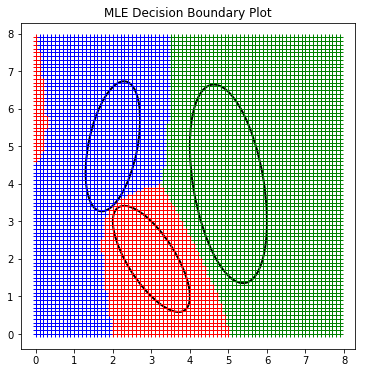

In [90]:
mle_points_c1 = []
mle_points_c2 = []
mle_points_c3 = []

X,Y = np.mgrid[0:8:.1, 0:8:.1]
points=np.array([X.flatten(),Y.flatten()]).T

for point in points:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    if p_x_c1 > p_x_c2 and p_x_c1 > p_x_c3:  mle_points_c1.append(point.tolist())
    elif p_x_c2 > p_x_c1 and p_x_c2 > p_x_c3:  mle_points_c2.append(point.tolist())
    else: mle_points_c3.append(point.tolist())
        
fig, ax = plt.subplots(figsize=(6,6))

angle1=np.degrees(np.arctan((v_1[0,1])/(v_1[1,1])))*(-1)
e1 = patches.Ellipse((mean_1), std_1[0]*2, std_1[1]*2,angle=angle1, linewidth=2, fill=False, zorder=1)
ax.add_patch(e1)        

angle2=np.degrees(np.arctan((v_2[0,1])/(v_2[1,1])))*(-1)
e2 = patches.Ellipse((mean_2), std_2[0]*2, std_2[1]*2,angle=angle2, linewidth=2, fill=False, zorder=1)
ax.add_patch(e2)        

angle3=np.degrees(np.arctan((v_3[0,1])/(v_3[1,1])))*(-1)
e3 = patches.Ellipse((mean_3), std_3[0]*2, std_3[1]*2,angle=angle3, linewidth=2, fill=False, zorder=1)
ax.add_patch(e3)   

plt.title('MLE Decision Boundary Plot')
plt.plot(np.array(mle_points_c1)[:,0],np.array(mle_points_c1)[:,1],'r+')
plt.plot(np.array(mle_points_c2)[:,0],np.array(mle_points_c2)[:,1],'g+')
plt.plot(np.array(mle_points_c3)[:,0],np.array(mle_points_c3)[:,1],'b+')
plt.show()

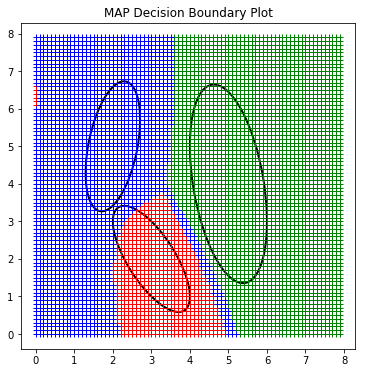

In [91]:
map_points_c1 = []
map_points_c2 = []
map_points_c3 = []

X,Y = np.mgrid[0:8:.1, 0:8:.1]
points=np.array([X.flatten(),Y.flatten()]).T


for point in points:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
        
    if p_x_c1*p_1 > p_x_c2*p_2 and p_x_c1*p_1 > p_x_c3*p_3:  map_points_c1.append(point.tolist())
    elif p_x_c2*p_1 > p_x_c1*p_2 and p_x_c2*p_2 > p_x_c3*p_3:  map_points_c2.append(point.tolist())
    else: map_points_c3.append(point.tolist())

        
fig, ax = plt.subplots(figsize=(6,6))

angle1=np.degrees(np.arctan((v_1[0,1])/(v_1[1,1])))*(-1)
e1 = patches.Ellipse((mean_1), std_1[0]*2, std_1[1]*2,angle=angle1, linewidth=2, fill=False, zorder=1)
ax.add_patch(e1)        

angle2=np.degrees(np.arctan((v_2[0,1])/(v_2[1,1])))*(-1)
e2 = patches.Ellipse((mean_2), std_2[0]*2, std_2[1]*2,angle=angle2, linewidth=2, fill=False, zorder=1)
ax.add_patch(e2)        

angle3=np.degrees(np.arctan((v_3[0,1])/(v_3[1,1])))*(-1)
e3 = patches.Ellipse((mean_3), std_3[0]*2, std_3[1]*2,angle=angle3, linewidth=2, fill=False, zorder=1)
ax.add_patch(e3)        
        
plt.title('MAP Decision Boundary Plot')
plt.plot(np.array(map_points_c1)[:,0],np.array(map_points_c1)[:,1],'r+')
plt.plot(np.array(map_points_c2)[:,0],np.array(map_points_c2)[:,1],'g+')
plt.plot(np.array(map_points_c3)[:,0],np.array(map_points_c3)[:,1],'b+')
plt.show()

b. Generate a 3000 sample dataset using the prior probabilities of each class. For both the ML and MAP classifiers: classify the generated dataset, calculate a confusion matrix, and calculate the experimental P(ε). Discuss the results.

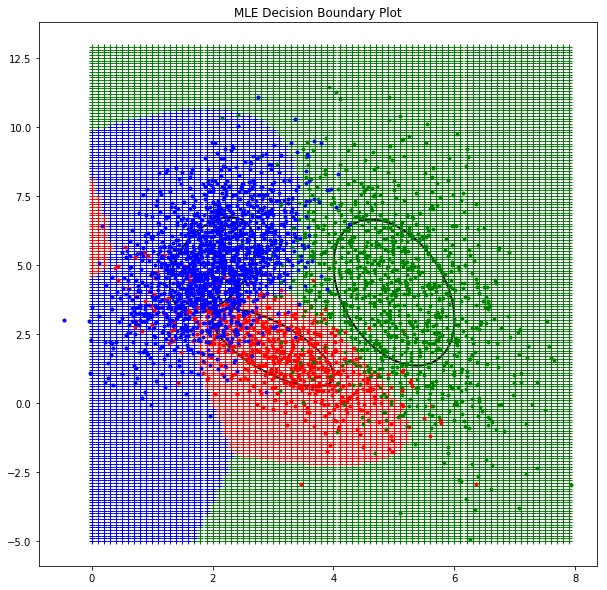

In [97]:
mle_points_c1 = []
mle_points_c2 = []
mle_points_c3 = []

X,Y = np.mgrid[0:8:.1, -5:13:.1]
points=np.array([X.flatten(),Y.flatten()]).T

for point in points:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
  
    if p_x_c1 > p_x_c2 and p_x_c1 > p_x_c3:  mle_points_c1.append(point.tolist())
    elif p_x_c2 > p_x_c1 and p_x_c2 > p_x_c3:  mle_points_c2.append(point.tolist())
    else: mle_points_c3.append(point.tolist())
        
fig, ax = plt.subplots(figsize=(10,10))

angle1=np.degrees(np.arctan((v_1[0,1])/(v_1[1,1])))*(-1)
e1 = patches.Ellipse((mean_1), std_1[0]*2, std_1[1]*2,angle=angle1, linewidth=2, fill=False, zorder=1)
ax.add_patch(e1)        

angle2=np.degrees(np.arctan((v_2[0,1])/(v_2[1,1])))*(-1)
e2 = patches.Ellipse((mean_2), std_2[0]*2, std_2[1]*2,angle=angle2, linewidth=2, fill=False, zorder=1)
ax.add_patch(e2)        

angle3=np.degrees(np.arctan((v_3[0,1])/(v_3[1,1])))*(-1)
e3 = patches.Ellipse((mean_3), std_3[0]*2, std_3[1]*2,angle=angle3, linewidth=2, fill=False, zorder=1)
ax.add_patch(e3)   


plt.title('MLE Decision Boundary Plot')
plt.plot(np.array(mle_points_c1)[:,0],np.array(mle_points_c1)[:,1],'r+')
plt.plot(np.array(mle_points_c2)[:,0],np.array(mle_points_c2)[:,1],'g+')
plt.plot(np.array(mle_points_c3)[:,0],np.array(mle_points_c3)[:,1],'b+')

plt.plot(data_1[:,0],data_1[:,1],'r.')
plt.plot(data_2[:,0],data_2[:,1],'g.')
plt.plot(data_3[:,0],data_3[:,1],'b.')

plt.show()

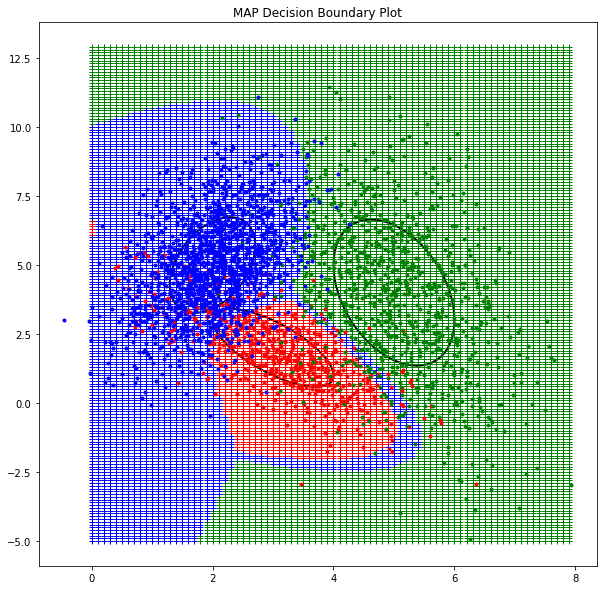

In [99]:
map_points_c1 = []
map_points_c2 = []
map_points_c3 = []

X,Y = np.mgrid[0:8:.1, -5:13:.1]
points=np.array([X.flatten(),Y.flatten()]).T


for point in points:
    p_x_c1 = get_likelyhood(point, mean_1, cov_1)
    p_x_c2 = get_likelyhood(point, mean_2, cov_2)
    p_x_c3 = get_likelyhood(point, mean_3, cov_3)
        
    if p_x_c1*p_1 > p_x_c2*p_2 and p_x_c1*p_1 > p_x_c3*p_3:  map_points_c1.append(point.tolist())
    elif p_x_c2*p_1 > p_x_c1*p_2 and p_x_c2*p_2 > p_x_c3*p_3:  map_points_c2.append(point.tolist())
    else: map_points_c3.append(point.tolist())

        
fig, ax = plt.subplots(figsize=(10,10))

angle1=np.degrees(np.arctan((v_1[0,1])/(v_1[1,1])))*(-1)
e1 = patches.Ellipse((mean_1), std_1[0]*2, std_1[1]*2,angle=angle1, linewidth=2, fill=False, zorder=1)
ax.add_patch(e1)        

angle2=np.degrees(np.arctan((v_2[0,1])/(v_2[1,1])))*(-1)
e2 = patches.Ellipse((mean_2), std_2[0]*2, std_2[1]*2,angle=angle2, linewidth=2, fill=False, zorder=1)
ax.add_patch(e2)        

angle3=np.degrees(np.arctan((v_3[0,1])/(v_3[1,1])))*(-1)
e3 = patches.Ellipse((mean_3), std_3[0]*2, std_3[1]*2,angle=angle3, linewidth=2, fill=False, zorder=1)
ax.add_patch(e3)        
        
plt.title('MAP Decision Boundary Plot')
plt.plot(np.array(map_points_c1)[:,0],np.array(map_points_c1)[:,1],'r+')
plt.plot(np.array(map_points_c2)[:,0],np.array(map_points_c2)[:,1],'g+')
plt.plot(np.array(map_points_c3)[:,0],np.array(map_points_c3)[:,1],'b+')

plt.plot(data_1[:,0],data_1[:,1],'r.')
plt.plot(data_2[:,0],data_2[:,1],'g.')
plt.plot(data_3[:,0],data_3[:,1],'b.')

plt.show()